In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
%matplotlib widget
from scipy import signal, interpolate
import pandas as pds

In [2]:
def coef_Nemi(G,h=0.21,l=0.14,R=50):
    u0=4*np.pi*10e-7
    C=2*u0*np.sqrt(h**2 +l**2)/(np.pi*R*l*h)
    #G-20*np.log10(C)
    return C


In [3]:
def plot_PSD(wf, G, fs=2e6, nperseg=2**20, ax=None, label="PSD (nV/sqrt(Hz))", save=False,namef='file.npy',Nemi=False,C=1):
    
    f, Pxx_den = signal.welch(wf, fs, nperseg=nperseg, detrend='linear', average='median')
    
    if Nemi==True:
        G=G-20*np.log10(C)
    if type(G) not in (float, int): 
        G=interpolate.interp1d(G.index.values, G.values, bounds_error=False)
        G=G(f)

    if ax is not None:
        ax.loglog(f, np.sqrt(Pxx_den)/(10**(G/20)), label=label)
    else:
        plt.figure(figsize=(10, 6))
        plt.loglog(f, np.sqrt(Pxx_den)/(10**(G/20)), label=label)
        ax=plt.gca()
    if save==True:
        with open(namef, 'wb') as e:
            np.save(e, np.array([f, np.sqrt(Pxx_den)/(10**(G/20))]))

    plt.xlabel('frequency [Hz]')
    if Nemi==True:
        plt.ylabel('PSD [T/sqrt(Hz)]')
    else:
        plt.ylabel('PSD [V/sqrt(Hz)]')
    plt.legend()
    return ax

In [4]:
def gain(path='path',channel="Channel 2 Magnitude (dB)",channel_ref="Channel 1 Magnitude (dB)",attenuation=0):
    
    df=pds.read_csv(path, index_col=[0])
    return df[channel]+attenuation


In [5]:

def plot_gain(G,ax=None,label='Gain'):
    if ax is not None:
        ax.plot(G, label=label)
    else:
        plt.figure()
        plt.plot(G, label=label)
        ax=plt.gca()
        plt.semilogx()
    plt.legend()
    return ax

<Axes: >

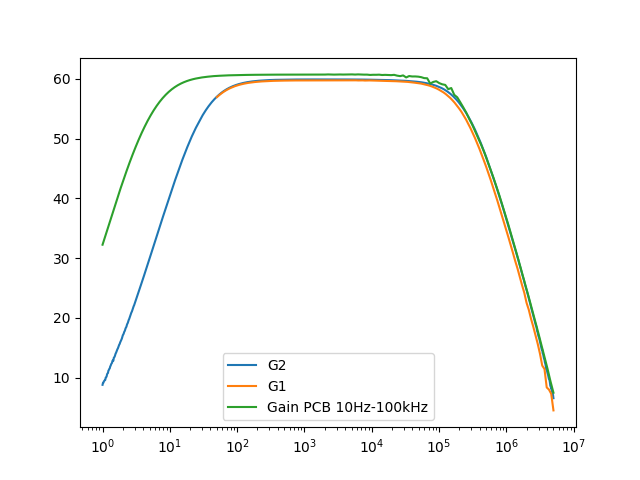

In [6]:
G1=gain("/home/jli/Documents/lpp/TF_AMP_JFE_Ids=126uA,R6=10k,R7=2k_V2.csv","Channel 2 Magnitude (dB)","Channel 1 Magnitude (dB)",33)
G2=gain("/home/jli/Documents/lpp/TF_AMP_JFE_Ids=1.2mA,R6=2k,R7=500_V2.csv","Channel 2 Magnitude (dB)","Channel 1 Magnitude (dB)",33)
G3=gain("/home/jli/Documents/lpp/FT_PCB_10Hz_100kHz_2ndstage.csv","Channel 2 Magnitude (dB)","Channel 1 Magnitude (dB)",33)

ax=plot_gain(G2,ax=None,label='G2')
plot_gain(G1,ax=ax,label='G1')
plot_gain(G3,ax=ax,label='Gain PCB 10Hz-100kHz')

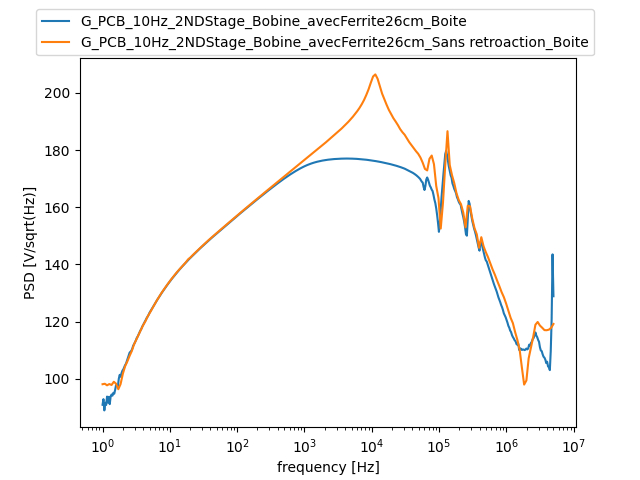

In [7]:

G=gain('/home/jli/Documents/lpp/TF_Bobine_amp1stStage_S=210*140.csv',"Channel 2 Magnitude (dB)","Channel 1 Magnitude (dB)",107)

G_2460=gain("/home/jli/Documents/lpp/FT_Bobine_2460Tours_et_ampli.csv","Channel 2 Magnitude (dB)","Channel 1 Magnitude (dB)",180)

G_4x=gain("/home/jli/Documents/lpp/FT_4X bobine 25mm 1500 spires_et_ampli.csv","Channel 2 Magnitude (dB)","Channel 1 Magnitude (dB)",180)

G_9x764=gain("/home/jli/Documents/lpp/FT_9X764 bobine_et_ampli.csv","Channel 2 Magnitude (dB)","Channel 1 Magnitude (dB)",180)

G_9x764_ferrite26=gain("/home/jli/Documents/lpp/FT_9X764 bobine_et_ampli_ferrite 26cm.csv","Channel 2 Magnitude (dB)","Channel 1 Magnitude (dB)",180)

G_PCB_10Hz_Bobine40cm_Pleci=gain("/home/jli/Documents/lpp/FT_PCB_3*330uF_C10=10uF_ptDiv=1k_1stStage_&Bobine 40cm.csv","Channel 2 Magnitude (dB)","Channel 1 Magnitude (dB)",107)
G_PCB_10Hz_Bobine40cm_Boite=gain("/home/jli/Documents/lpp/FT_amp 10-100kHz 2NDStage_Bobine 40cm_Boite.csv","Channel 2 Magnitude (dB)","Channel 1 Magnitude (dB)",180)

G_PCB_10Hz_1stStage_Bobine_avecFerrite26cm_Pleci=gain("/home/jli/Documents/lpp/FT_9X764 bobine_10Hz-100kHz_ferrite26cm_et_ampli_1stStage_surPleci.csv","Channel 2 Magnitude (dB)","Channel 1 Magnitude (dB)",107)
G_PCB_10Hz_1stStage_Bobine_avecFerrite26cm_Boite=gain("/home/jli/Documents/lpp/FT_9X764 bobine_10Hz-100kHz_ferrite26cm_et_ampli_1stStage_dansBoite.csv","Channel 2 Magnitude (dB)","Channel 1 Magnitude (dB)",180)
G_PCB_10Hz_2NDStage_Bobine_avecFerrite26cm_Boite=gain("/home/jli/Documents/lpp/FT_9X764 bobine_10Hz-100kHz_ferrite26cm_et_ampli_2NDStage_dansBoite.csv","Channel 2 Magnitude (dB)","Channel 1 Magnitude (dB)",180)
G_PCB_10Hz_2NDStage_Bobine_avecFerrite26cm_Sans_retroaction_Boite=gain("/home/jli/Documents/lpp/FT_9X764 bobine_10Hz-100kHz_ferrite26cm_et_ampli_2NDStage_Sans Retroaction_dansBoite.csv","Channel 2 Magnitude (dB)","Channel 1 Magnitude (dB)",180)

#ax=plot_gain(G,label='G')

#plot_gain(G_2460,ax=ax,label='G_2460')
#plot_gain(G_4x,ax=ax,label='G_4x')
#ax=plot_gain(G_9x764,ax=None,label='G_9x764 ferrite ')
#plot_gain(G_9x764_ferrite26,ax=ax,label='G_9x764 ferrite de 26cm')
#ax=plot_gain(G_PCB_10Hz_Bobine40cm_Pleci ,ax=None,label='G_PCB_10Hz_Bobine40cm_Pleci')
#plot_gain(G_PCB_10Hz_Bobine40cm_Boite,ax=ax,label='G_PCB_10Hz_Bobine40cm_Boite')
#plot_gain(G_PCB_10Hz_1stStage_Bobine_avecFerrite26cm_Pleci,ax=ax,label='G_PCB_10Hz_1stStage_Bobine_avecFerrite26cm_Pleci')
#plot_gain(G_PCB_10Hz_1stStage_Bobine_avecFerrite26cm_Boite,ax=ax,label='G_PCB_10Hz_1stStage_Bobine_avecFerrite26cm_Boite')
ax=plot_gain(G_PCB_10Hz_2NDStage_Bobine_avecFerrite26cm_Boite,ax=None,label='G_PCB_10Hz_2NDStage_Bobine_avecFerrite26cm_Boite')
plot_gain(G_PCB_10Hz_2NDStage_Bobine_avecFerrite26cm_Sans_retroaction_Boite,ax=ax,label='G_PCB_10Hz_2NDStage_Bobine_avecFerrite26cm_Sans retroaction_Boite')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V/sqrt(Hz)]')
plt.legend(bbox_to_anchor=(1.05, 1.15), loc='upper right')

(100, 1000000.0)

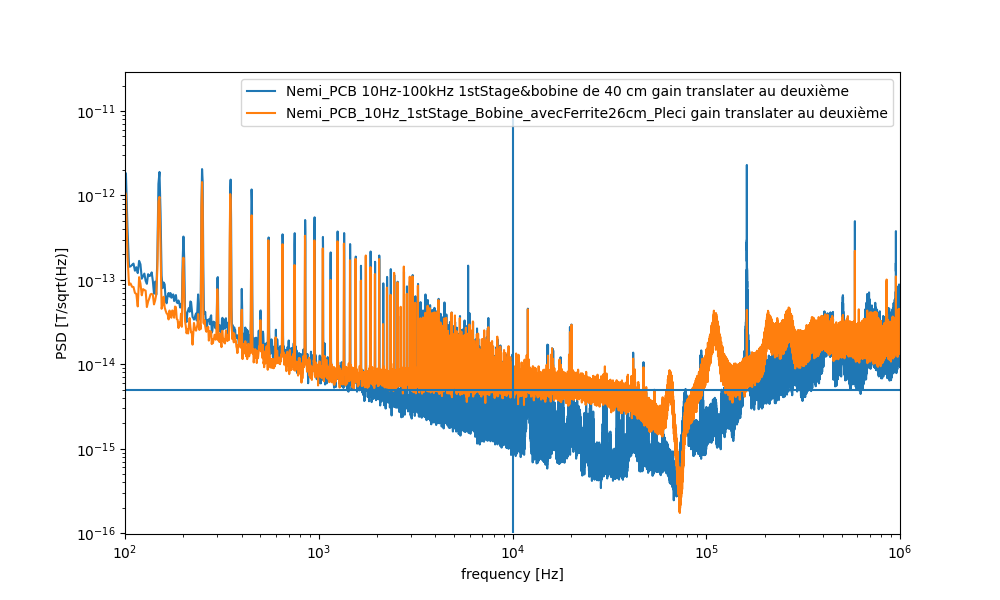

In [11]:
#C_boite=10e-9
#C_th=coef_Nemi(G,h=2.1,l=1.4,R=50)
#C_boite_th=coef_Nemi(G_4x,h=0.20,l=0.34,R=50)

#ax=plot_PSD(np.load("petite bobine 2460tours.npy"), G_2460, ax=None, label="Nemi_2460",save=True,namef='Nemi_2460.npy',Nemi=True,C=1)
#plot_PSD(np.load("bobine 40cm_ampli.npy"), G, ax=ax, label="Nemi amp & bobine",Nemi=True,C=1)
#plot_PSD(np.load("4X bobine 25mm 1500 spires.npy"), G_4x, ax=ax, label="Nemi_4x",save=True,namef='Nemi_4x.npy',Nemi=True,C=1)
#plot_PSD(np.load("bobine 9X764 spires.npy"), G_9x764, ax=ax, label="Nemi_9x764",save=True,namef='Nemi_9x764.npy',Nemi=True,C=1)
#plot_PSD(np.load("./bobine 9X764 spires ferrite 26cm.npy"), G_9x764_ferrite26, ax=None, label="Nemi_9x764 ferrite 26cm",save=True,namef='Nemi_9x764_ferrite 26cm.npy',Nemi=True,C=1)
ax=plot_PSD(np.load("./Bruit PCB 10Hz-100kHz 2NDStage_searchcoil_40cm sample=2**24_&2M_ech.npy"), G_PCB_10Hz_Bobine40cm_Pleci+20+6, ax=None, label="Nemi_PCB 10Hz-100kHz 1stStage&bobine de 40 cm gain translater au deuxième",save=True,namef='Nemi_PCB 10Hz-100kHz 1stStage&bobine de 40 cm.npy',Nemi=True,C=1)
plot_PSD(np.load("Bruit PCB 10Hz-100kHz 2NDStage_searchcoil_ferrite26cm sample=2**24_&2M_ech.npy"), G_PCB_10Hz_1stStage_Bobine_avecFerrite26cm_Pleci+20+6, ax=ax, label="Nemi_PCB_10Hz_1stStage_Bobine_avecFerrite26cm_Pleci gain translater au deuxième",save=True,namef='Nemi_PCB_10Hz-100kHz_1stStage_Bobine_avecFerrite26cm_Pleci.npy',Nemi=True,C=1)
#plot_PSD(np.load("Bruit PCB 10Hz-100kHz 2NDStage_searchcoil_ferrite26cm sample=2**24_&2M_ech.npy"), G_PCB_10Hz_2NDStage_Bobine_avecFerrite26cm_Boite +6 , ax=ax, label="Nemi_PCB_10Hz_2NDStage_Bobine_avecFerrite26cm_Boite",save=True,namef='Nemi_PCB_10Hz-100kHz_2NDStage_Bobine_avecFerrite26cm_Boite.npy',Nemi=True,C=1)


plt.hlines(5e-15, 100, 1e7)
plt.vlines(10e3, 1e-16, 1e-11)
plt.xlim(100, 1e6)

In [9]:
#ax=plot_PSD(np.load("bobine 9X764 spires.npy"), 0, ax=None, label="Nemi_9x764")
#plot_PSD(np.load("bobine 9X764 spires sans ferrite.npy"), 0, ax=ax, label="Nemi_9x764 sans ferrite")
#plot_PSD(np.load("bobine 9X764 spires ferrite 26cm.npy"), 0, ax=ax, label="Nemi_9x764 ferrite de 26cm")
#plot_PSD(np.load("bobine 9X764 spires mu-metal.npy"), 0, ax=ax, label="Nemi_9x764 mu-metal")


/home/jli/.local/lib/python3.13/site-packages/ipympl/backend_nbagg.py:335: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


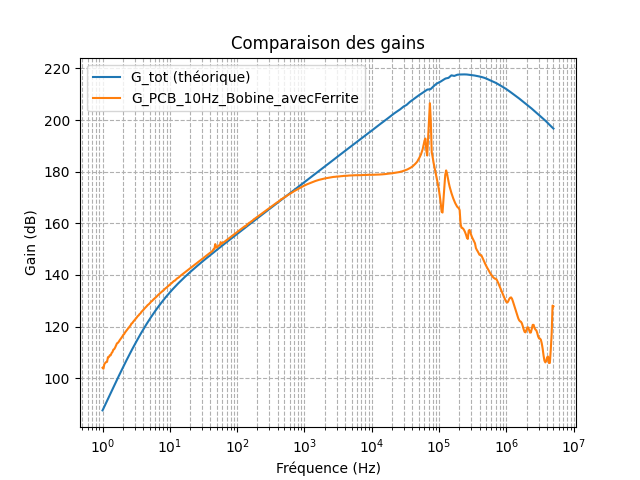

In [12]:
S=np.pi*0.005
N=5886
mu_app=80
f = np.linspace(1, 5e6, 20000000)

G3_interp = interpolate.interp1d(G3.index.values, G3.values, kind='linear', fill_value='extrapolate')
G3_new = G3_interp(f)

H_bobine=2*np.pi*N*S*f
G_tot=(G3_new)+20*np.log10(H_bobine)

plt.figure()
plt.plot(f, G_tot, label='G_tot (théorique)')
plt.xscale('log')

plot_gain(G_PCB_10Hz_1stStage_Bobine_avecFerrite26cm_Pleci+20, ax=plt.gca(), label='G_PCB_10Hz_Bobine_avecFerrite')


plt.xlabel("Fréquence (Hz)")
plt.ylabel("Gain (dB)")
plt.title("Comparaison des gains")
plt.legend()
plt.grid(True, which='both', ls='--')

plt.show()

/home/jli/.local/lib/python3.13/site-packages/ipympl/backend_nbagg.py:335: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


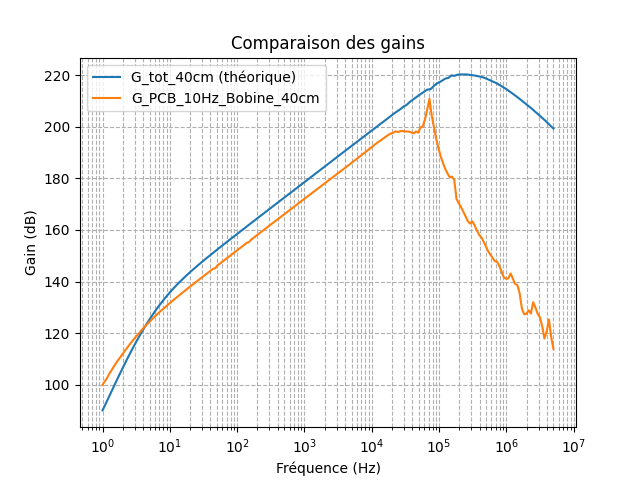

In [18]:
S_40cm=np.pi*0.18
N_40cm=440
f = np.linspace(1, 5e6, 20000000)

G3_interp = interpolate.interp1d(G3.index.values, G3.values, kind='linear', fill_value='extrapolate')
G3_new = G3_interp(f)

H_bobine_40cm=2*np.pi*N_40cm*S_40cm*f*np.cos(np.pi/3)
G_tot_40cm=(G3_new)+20*np.log10(H_bobine_40cm)

plt.figure()
plt.plot(f, G_tot_40cm, label='G_tot_40cm (théorique)')
plt.xscale('log')

plot_gain(G_PCB_10Hz_Bobine40cm_Pleci+20, ax=plt.gca(), label='G_PCB_10Hz_Bobine_40cm')
#plot_gain(G_PCB_10Hz_Bobine40cm_Boite, ax=plt.gca(), label='G_PCB_10Hz_Bobine_40cm_boite')

#plt.plot(f, G_tot, label='G_tot (théorique)')
#plot_gain(G_PCB_10Hz_2NDStage_Bobine_avecFerrite26cm_Boite, ax=plt.gca(), label='G_PCB_10Hz_Bobine_avecFerrite')
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Gain (dB)")
plt.title("Comparaison des gains")
plt.legend()
plt.grid(True, which='both', ls='--')

plt.show()

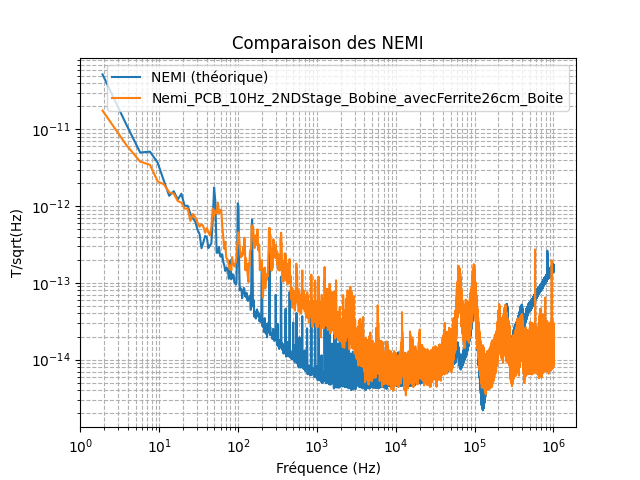

In [14]:
R=295
k=1.38*10**-23
T=273+20
i=1.8e-12
vn=0.9e-9

en=np.sqrt(4*k*T*R)

f1,PSD_PCB=np.load("PSD bruit en entrée PCB 10Hz-100kHz")

G0_i = interpolate.interp1d(G_PCB_10Hz_2NDStage_Bobine_avecFerrite26cm_Boite.index.values, G_PCB_10Hz_2NDStage_Bobine_avecFerrite26cm_Boite.values, kind='linear', fill_value='extrapolate')
G0_new = G0_i(f1)
Bruit=np.sqrt((en**2) + (PSD_PCB**2))
plt.figure()

G3_interp_bis = interpolate.interp1d(G3.index.values, G3.values, kind='linear', fill_value='extrapolate')
G3_new_bis = G3_interp_bis(f1)
plt.plot(f1, Bruit/(10**((G0_new-G3_new_bis)/20)), label='NEMI (théorique)')


#H_bobine1=2*np.pi*N*S*f1
#plt.plot(f1, en/H_bobine1, label='NEMI searchcoil(théorique)')
#plt.xscale('log')

plot_PSD(np.load("Bruit PCB 10Hz-100kHz 2NDStage&bobine avec ferrite 26cm.npy"), G_PCB_10Hz_1stStage_Bobine_avecFerrite26cm_Boite +20+6 , ax=plt.gca(), label="Nemi_PCB_10Hz_2NDStage_Bobine_avecFerrite26cm_Boite",save=True,namef='Nemi_PCB_10Hz-100kHz_2NDStage_Bobine_avecFerrite26cm_Boite.npy',Nemi=True,C=1)


plt.xlabel("Fréquence (Hz)")
plt.ylabel("T/sqrt(Hz)")
plt.title("Comparaison des NEMI")
plt.legend()
plt.grid(True, which='both', ls='--')

plt.show()

<Axes: xlabel='frequency [Hz]', ylabel='PSD [V/sqrt(Hz)]'>

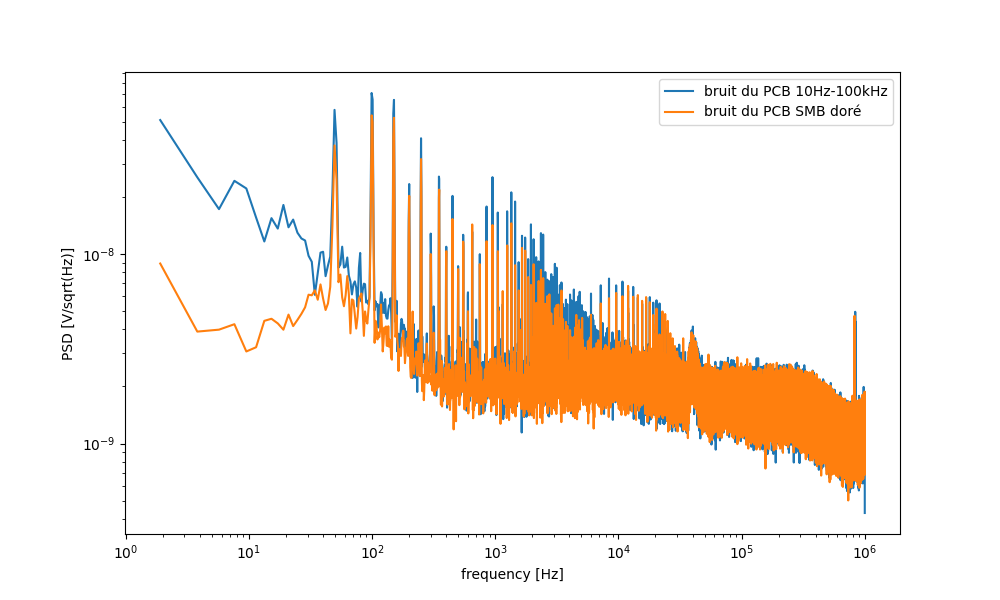

In [15]:
NFFT=2**20
Gt=gain('/home/jli/Documents/lpp/TF_AMP_JFE_Ids=1.19mA,R6=3.3k,R7=500_V2.csv',"Channel 2 Magnitude (dB)","Channel 1 Magnitude (dB)",33)
#ax=plot_PSD(np.load("PCB, SMB doré,47ohm, Tiroir,Boite , R6=3.3kohm.npy"), Gt+6, fs=2e6,nperseg=NFFT, ax=None, label="50 Ohm")
#ax=plot_PSD(np.load("PCB, SMB doré,68ohm, Tiroir,Boite , R6=3.3kohm.npy"), Gt+6, fs=2e6,nperseg=NFFT, ax=ax, label="68 Ohm")
#ax=plot_PSD(np.load("PCB, SMB doré,182ohm, Tiroir,Boite , R6=3.3kohm.npy"), Gt+6, fs=2e6,nperseg=NFFT, ax=ax, label="182 Ohm")
#ax=plot_PSD(np.load("PCB, SMB doré,470ohm, Tiroir,Boite , R6=3.3kohm.npy"), Gt+6, fs=2e6,nperseg=NFFT, ax=ax, label="470 Ohm")
#ax=plot_PSD(np.load("PCB, SMB doré,1kohm, Tiroir,Boite , R6=3.3kohm.npy"), Gt+6, fs=2e6,nperseg=NFFT, ax=ax, label="1k Ohm")
#ax=plot_PSD(np.load("PCB, SMB doré,4.7kohm, Tiroir,Boite , R6=3.3kohm.npy"), Gt+6, fs=2e6,nperseg=NFFT, ax=ax, label="4.7k Ohm")
#ax=plot_PSD(np.load("PCB, SMB doré,27kohm, Tiroir,Boite , R6=3.3kohm.npy"), Gt+6, fs=2e6,nperseg=NFFT, ax=ax, label="27k Ohm")
#ax=plot_PSD(np.load("PCB, SMB doré,47kohm, Tiroir,Boite , R6=3.3kohm.npy"), Gt+6, fs=2e6,nperseg=NFFT, ax=ax, label="47k Ohm")
#ax=plot_PSD(np.load("PCB, SMB doré,100kohm, Tiroir,Boite , R6=3.3kohm.npy"), Gt+6, fs=2e6,nperseg=NFFT, ax=ax, label="100k Ohm")
ax=plot_PSD(np.load("Bruit PCB 10Hz-100kHz seul 2ndstage_bouchon50ohm sample=2**24_&2M_ech.npy"),G3+6, fs=2e6,nperseg=NFFT, ax=None, label="bruit du PCB 10Hz-100kHz",save=True,namef="PSD bruit en entrée PCB 10Hz-100kHz")
plot_PSD(np.load("Bruit PCB SMB doré seul_bouchon50ohm_2NDStage sample=2**24_&2M_ech.npy"),G3+6, fs=2e6,nperseg=NFFT, ax=ax, label="bruit du PCB SMB doré",save=True,namef="PSD bruit en entrée PCB SMB doré")

#line=plt.gca().lines[-1]
#y_data=line.get_ydata()
#x_data=line.get_xdata()

#min_PSD_470ohm_Tiroir=np.nanmin(y_data)
#min_index=np.nanargmin(y_data)
#min_f_470ohm_Tiroir=x_data[min_index]



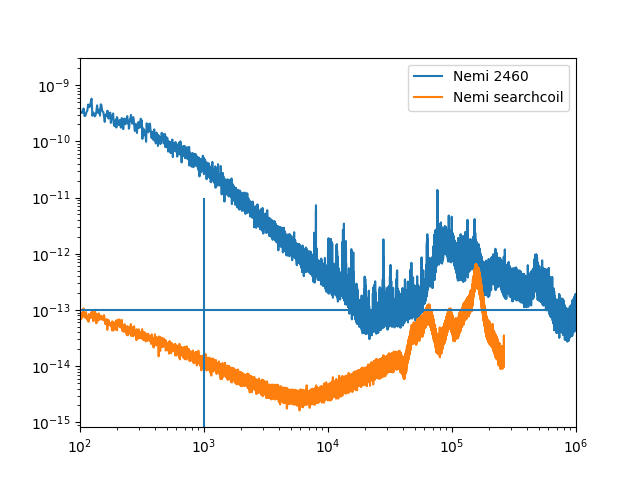

In [16]:
plt.figure()
f,PSD_1=np.load("Nemi_2460.npy")
n2=np.load("NEMI_Bobine&Amp_1stStage.npy")
plt.loglog(f,PSD_1,label="Nemi 2460")
plt.plot(n2,label="Nemi searchcoil")
plt.hlines(1e-13, 100, 1e7)
plt.vlines(1e3, 1e-16, 1e-11)
plt.xlim(100, 1e6)
plt.legend()
plt.show()

In [17]:
10**(-114/20)


1.9952623149688787e-06